<h1> <center> TEAM MET-A-FOUR <center> </h1>

## Team Members 
- Kavya Mannem (NUID - 002194057)
- Aishwarya Wagdarkar (NUID - 002964461)
- Sai Srujan Penta (NUID - 002928427)
- Raveena Lalbahadur Yadav (NUID - 002106277)

# Dataset 

OurWorldinData, a website that primarily focuses on carbon dioxide and greenhouse gases, has a dataset of global CO2 emission data that we have selected - https://ourworldindata.org/co2-emissions

Global climate change is mostly caused by carbon dioxide emissions. It is commonly acknowledged that the world needs to reduce emissions quickly if it wants to avoid the worst effects of climate change. However, the division of this responsibility among nations, regions, and people has long been a source of dispute in international talks.


Dataset can be found at github.com/owid/co2-data

https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv contains information about each column's description and its unit.

The current notebook analyzes the data and makes an effort to evaluate the CO2 emissions for each country while also projecting data for a select few nations over the following 15 years.

### 1. Exploratory data analysis
### 2. Data Preprocessing
### 3. Visualizations of Data
### 4. Predictions using Linear Regression 
### 5. Forecasting next 15 years data using Naive bayes algorithm 
### 6. Forecasting next 15 years data using Random Forest algorithm
### 7. Conclusion
### 8. Future Scope

### IMPORTING THE REQUIRED MODULES

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Exploratory Data Analysis

**READING THE DATASET**

In [2]:
df = pd.read_csv("co2-dataset.csv")

In [3]:
df.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


**BASIC SUMMARY OF THE DATASET**

In [4]:
# The dataframe's shape
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

#Information regarding the datatypes
print("\nDatatypes Info:")
print(df.info())

# Inspection of Missing Value
print("\nMissing Values:")
print(df.isna().sum())

Number of Rows: 25204
Number of Columns: 58

Datatypes Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25204 entries, 0 to 25203
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21948 non-null  object 
 1   country                              25204 non-null  object 
 2   year                                 25204 non-null  int64  
 3   co2                                  23949 non-null  float64
 4   consumption_co2                      3976 non-null   float64
 5   co2_growth_prct                      24931 non-null  float64
 6   co2_growth_abs                       23585 non-null  float64
 7   trade_co2                            3976 non-null   float64
 8   co2_per_capita                       23307 non-null  float64
 9   consumption_co2_per_capita           3976 non-null   float64
 10  share_global_co2                 

In [5]:
# Summary Stats
print("\nSummary:")
print(df.describe())


Summary:
               year           co2  consumption_co2  co2_growth_prct  \
count  25204.000000  23949.000000      3976.000000     24931.000000   
mean    1953.225797    267.861942       916.755170        21.098600   
std       53.791369   1521.680894      3373.348275       702.565991   
min     1750.000000      0.000000         0.197000       -99.640000   
25%     1925.000000      0.528000        10.319750        -0.450000   
50%     1967.000000      4.857000        57.091000         3.350000   
75%     1995.000000     42.818000       276.378750        10.460000   
max     2020.000000  36702.503000     36702.503000    102318.510000   

       co2_growth_abs    trade_co2  co2_per_capita  \
count    23585.000000  3976.000000    23307.000000   
mean         5.146889    -2.415624        4.170811   
std         55.259760   182.444942       14.912201   
min      -1895.244000 -1657.998000        0.000000   
25%         -0.011000    -0.892500        0.253000   
50%          0.059000     

# 2. DATA PRE PROCESSING

*The following function will return the mapping dictionary after reading the country code to country name mapping.*

In [6]:
def get_iso3_country_dict(file='CountryName_ISO3.csv'):
    df = pd.read_csv(file,sep=';')
    countries = {}
    for index,row in df.iterrows():
        countries[row['ISO3']] = row['CountryName']
    return countries

*The get_avl_data_yrs() will return if a country contains all the data for a specific column and also the first year and the last year of the availability*

In [7]:
def get_avl_data_yrs(df,country,column):
    country_df = df[(df['ISO3'] == country)][[column,'Year']].copy()
    country_df.dropna(inplace=True)
    
    year_list = country_df['Year'].to_list()
    try:
        minimum = min(year_list)
        maximum = max(year_list)
    except:
        minimum = -1
        maximum = -1
    complete = (len(year_list) == (maximum - minimum + 1))
    
    return {'first_year':minimum, 'last_year':maximum, 'data_complete':complete}

*The get_ctr_missing_data() will return a dictionary with countries which have missing values in the specificed year range and columns*

In [8]:
def get_ctr_missing_data(df,start_year,end_year,col_list):
    ctr_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    countries = set(df['ISO3'].to_list())
    countries = set(filter(lambda x: x == x , countries))
    name_dict = get_iso3_country_dict()
    incomplete_dict = {}
    for col in col_list:
        for ctr in countries:
            complete = True
            avl = get_avl_data_yrs(ctr_df,ctr,col)
            if (not(avl['data_complete'])
                or (not(avl['first_year'] == start_year))
                or (not(avl['last_year'] == end_year))):
                complete = False
                incomplete_dict[ctr] = name_dict[ctr]               
    return incomplete_dict

*The format_columns() will format the column names and will drop rows related to world*

In [9]:
def format_columns(df):    
    rename_map = {'year':'Year',
                  'country':'CountryName',
                  'iso_code':'ISO3'}
    df.rename(rename_map,axis=1,inplace=True)
    row_list = df[df['ISO3'].isna()].index.to_list()
    df.drop(row_list,inplace=True)
    
    # removing world rows from data 
    world = df.index[df['ISO3'] == 'OWID_WRL'].to_list()
    kos = df.index[df['ISO3'] == 'OWID_KOS'].to_list()
    df.drop(index=world,inplace=True)
    df.drop(index=kos,inplace=True) 

*The preproc_co2_data() will read the dataset and use the helper functions defined above to filter columns and drop rows which are not required based on the year ranges provided. We can also pass an optional parameter to write the cleaned data to a csv file*

In [10]:
def preproc_co2_data(write_csv=False,
                file_in='co2-dataset.csv',
                file_out='clean_tmp.csv'):
    df = pd.read_csv(file_in,sep=',')
    format_columns(df)

    # only keep co2 and population
    col_list = ['ISO3','Year','CountryName','co2','population','co2_growth_abs','share_global_co2']
    df = df[col_list].copy()

    # drop all countries where co2 or population is not completely
    # available between 1950 and 2020
    drop_list = list(get_ctr_missing_data(df,1950,2020,['co2','population']))
    for c in drop_list:
        idx_drop = df.index[df['ISO3'] == c].to_list()
        df.drop(index=idx_drop,inplace=True)
    dropped_countries = drop_list
    
    # drop years before 1972 and after 2020
    idx_drop = df.index[df['Year'] < 1950].to_list()
    df.drop(index=idx_drop,inplace=True)
    idx_drop = df.index[df['Year'] > 2020].to_list()
    df.drop(index=idx_drop,inplace=True)
    
    if write_csv:
        df.to_csv(file_out,sep=';')

    return df

**OUTPUT AFTER PRE PROCESSING THE DATA**

In [11]:
preproc_co2_data()

,ISO3,Year,CountryName,co2,population,co2_growth_abs,share_global_co2
1,AFG,1950,Afghanistan,0.084,7752117.0,0.070,0.00
2,AFG,1951,Afghanistan,0.092,7840151.0,0.007,0.00
3,AFG,1952,Afghanistan,0.092,7935996.0,0.000,0.00
4,AFG,1953,Afghanistan,0.106,8039684.0,0.015,0.00
5,AFG,1954,Afghanistan,0.106,8151316.0,0.000,0.00
...,...,...,...,...,...,...,...
25199,ZWE,2016,Zimbabwe,10.738,14030338.0,-1.488,0.03
25200,ZWE,2017,Zimbabwe,9.582,14236599.0,-1.156,0.03
25201,ZWE,2018,Zimbabwe,11.854,14438812.0,2.273,0.03
25202,ZWE,2019,Zimbabwe,10.949,14645473.0,-0.905,0.03


In [12]:
clean_df = preproc_co2_data()

In [13]:
def avl_report(df,countries,column):
    ''' prints data availability report to the screen'''
    ISO3_list = []
    name_list = []
    first_year_list = []
    last_year_list = []
    completeness_list = []
    
    country_dict = countryDictionary
    
    for c in countries:
        avl_dict = get_avl_data_yrs(df,c,column)
        ISO3_list.append(c)
        name_list.append(country_dict[c])        
        first_year_list.append(avl_dict['first_year'])        
        last_year_list.append(avl_dict['last_year'])        
        completeness_list.append(avl_dict['data_complete'])        
        
    df_out = pd.DataFrame()
    df_out['ISO3'] = ISO3_list
    df_out['CountryName'] = name_list
    df_out['first_year'] = first_year_list
    df_out['last_year'] = last_year_list
    df_out['completeness'] = completeness_list
    return df_out



In [14]:
country_list = list(set(clean_df['ISO3'].to_list()))

In [15]:
countryDictionary = {}
for (i,j) in df.iterrows():
    countryDictionary[j['iso_code']] = j['country']

countryDictionary

{'AFG': 'Afghanistan',
 nan: 'Wallis and Futuna',
 'ALB': 'Albania',
 'DZA': 'Algeria',
 'AND': 'Andorra',
 'AGO': 'Angola',
 'AIA': 'Anguilla',
 'ATA': 'Antarctica',
 'ATG': 'Antigua and Barbuda',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ABW': 'Aruba',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BHS': 'Bahamas',
 'BHR': 'Bahrain',
 'BGD': 'Bangladesh',
 'BRB': 'Barbados',
 'BLR': 'Belarus',
 'BEL': 'Belgium',
 'BLZ': 'Belize',
 'BEN': 'Benin',
 'BMU': 'Bermuda',
 'BTN': 'Bhutan',
 'BOL': 'Bolivia',
 'BES': 'Bonaire Sint Eustatius and Saba',
 'BIH': 'Bosnia and Herzegovina',
 'BWA': 'Botswana',
 'BRA': 'Brazil',
 'VGB': 'British Virgin Islands',
 'BRN': 'Brunei',
 'BGR': 'Bulgaria',
 'BFA': 'Burkina Faso',
 'BDI': 'Burundi',
 'KHM': 'Cambodia',
 'CMR': 'Cameroon',
 'CAN': 'Canada',
 'CPV': 'Cape Verde',
 'CAF': 'Central African Republic',
 'TCD': 'Chad',
 'CHL': 'Chile',
 'CHN': 'China',
 'CXR': 'Christmas Island',
 'COL': 'Colombia',
 'COM': 'Comoros',
 'COG': 'Co

In [16]:
len(countryDictionary)

220

In [17]:
print(avl_report(clean_df,country_list,'co2').to_string())

    ISO3                       CountryName  first_year  last_year  completeness
0    GTM                         Guatemala        1950       2020          True
1    BRB                          Barbados        1950       2020          True
2    CYP                            Cyprus        1950       2020          True
3    UGA                            Uganda        1950       2020          True
4    SYR                             Syria        1950       2020          True
5    AUS                         Australia        1950       2020          True
6    AFG                       Afghanistan        1950       2020          True
7    UZB                        Uzbekistan        1950       2020          True
8    MAR                           Morocco        1950       2020          True
9    ZWE                          Zimbabwe        1950       2020          True
10   LBR                           Liberia        1950       2020          True
11   IRQ                              Ir

In [18]:
clean_df['co2_growth_abs'] = clean_df['co2_growth_abs'].fillna(0)

**VERIFYING NULL VALUES AFTER PRE PROCESSING**

In [19]:
clean_df.isna().sum()

ISO3                0
Year                0
CountryName         0
co2                 0
population          0
co2_growth_abs      0
share_global_co2    0
dtype: int64

*The dropped_countries() will provide a dictionary of the nations that were eliminated from the preprocessing owing to incomplete data or other necessary checks.*

In [20]:
def dropped_countries(df):
    country_dict = get_iso3_country_dict()
    rem_countries = set(df['ISO3'].to_list())
    dropped_countries = set(list(country_dict)) - rem_countries
    dropped_dict = {}
    for c in dropped_countries:
        dropped_dict[c] = country_dict[c]    
    return dropped_dict

In [21]:
dropped_countries(clean_df)

{'PLW': 'Palau',
 'TUV': 'Tuvalu',
 'PSE': 'Palestine, State of',
 'AIA': 'Anguilla',
 'BWA': 'Botswana',
 'SYC': 'Seychelles',
 'ESH': 'Western Sahara',
 'TKL': 'Tokelau',
 'SCG': 'Serbia and Montenegro',
 'JEY': 'Jersey',
 'PCN': 'Pitcairn',
 'VDR': 'Vietnam, N.',
 'AND': 'Andorra',
 'MRT': 'Mauritania',
 'COK': 'Cook Islands',
 'YUG': 'Yugoslavia',
 'REU': 'Réunion',
 'SWZ': 'Eswatini',
 'MYT': 'Mayotte',
 'VIR': 'Virgin Islands (U.S.)',
 'KNA': 'Saint Kitts and Nevis',
 'IMN': 'Isle of Man',
 'GUM': 'Guam',
 'FSM': 'Micronesia (Federated States of)',
 'KHM': 'Cambodia',
 'ATF': 'French Southern Territories',
 'HMD': 'Heard Island and McDonald Islands',
 'LAO': "Lao People's Democratic Republic",
 'ARE': 'United Arab Emirates',
 'SGS': 'South Georgia and the South Sandwich Islands',
 'DMA': 'Dominica',
 'TCA': 'Turks and Caicos Islands',
 'COM': 'Comoros',
 'BLM': 'Saint Barthélemy',
 'PYF': 'French Polynesia',
 'DDR': 'Germany, E. ',
 'WLF': 'Wallis and Futuna',
 'GAB': 'Gabon',
 '

**CHECK FOR ANY OUTLIERS IN CO2 EMISSION COLUMN**

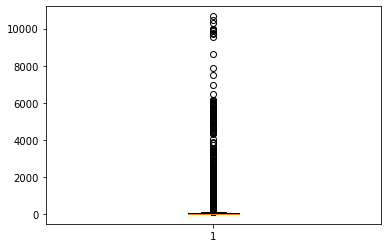

<Figure size 720x504 with 0 Axes>

In [22]:
plt.boxplot(clean_df.co2)
fig = plt.figure(figsize =(10, 7))
plt.show()

## EMISSIONS OF CO2 THROUGH TIME (1950-2020)

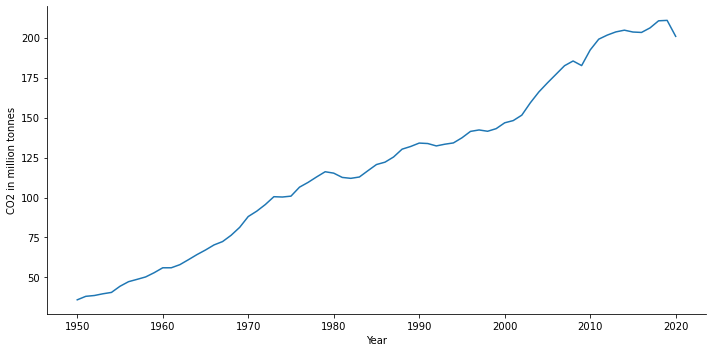

In [23]:
g = sns.relplot(
    data=clean_df, 
    x="Year", y="co2",
    height=5, aspect=2, 
    kind="line",ci=None)
g.set_axis_labels("Year", "CO2 in million tonnes")

The graph leads us to deduce the following information.<br>

**CO2** Emission has steadily climbed over the past 50 years, however it is currently trending downward with a sharp decline in 2020. The coronavirus-related shutdowns are to blame for the sharp decline in 2020.

In [24]:
def search_code (mapdata,country):
    for keyval in mapdata:
        if country.lower() == keyval['alpha-3'].lower():
            cont = keyval['region']
    return cont

def get_continent_mapping(df,file='continent_mapping.csv'):
    col_list = ['alpha-3','region']
    mapping_data = pd.read_csv(file,usecols=col_list,sep=',')
    cont_list = []
    cont_df = df.copy()
    mapdata = mapping_data.to_json(orient = 'records')
    mapdata = json.loads(mapdata)
    for value in df['ISO3']:
        output = search_code(mapdata,value)
        if (output!= None):
            cont_list.append(output)
        else:
            cont_list.append("NA")
    cont_df['continent'] = cont_list
    return cont_df

In [25]:
continent_df = get_continent_mapping(clean_df)
continent_df.columns

Index(['ISO3', 'Year', 'CountryName', 'co2', 'population', 'co2_growth_abs',
       'share_global_co2', 'continent'],
      dtype='object')

In [26]:
col_list_cont_df = ['continent','Year','co2']
cont_df_min = continent_df[col_list_cont_df].copy()

In [27]:
cont_df_min.isna().sum()

continent    0
Year         0
co2          0
dtype: int64

In [28]:
cont_df_final = cont_df_min.groupby('continent')['co2'].sum().reset_index()

## PERCENTAGE CONTRIBUTION OF CONTINENTS FROM 1950-2020

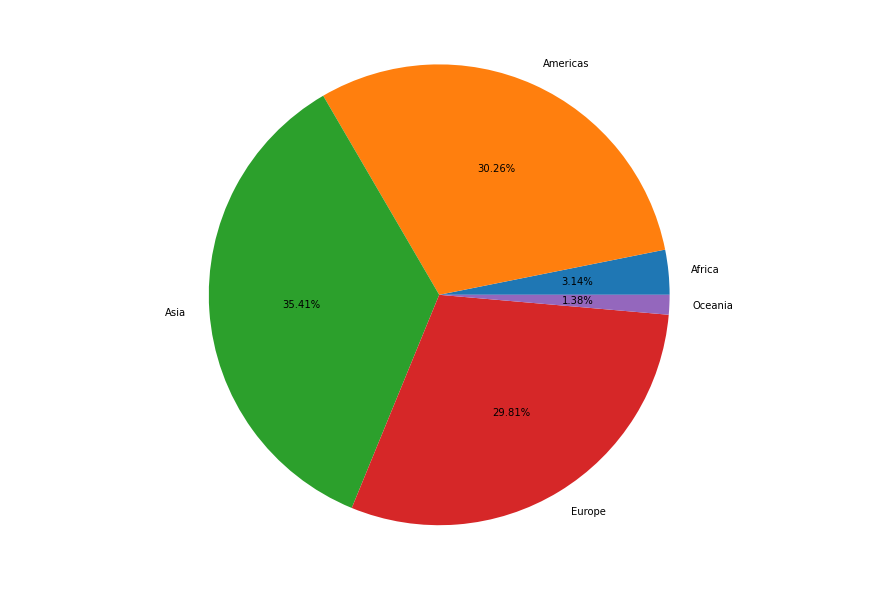

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.axis('equal')
ax.pie(cont_df_final['co2'], labels = cont_df_final["continent"],autopct='%1.2f%%')
plt.show()

We can see that throughout the time period in question, Asia has the largest CO2 emissions, whereas Oceania, which includes Australia, Melanesia, Micronesia, and Polynesia, has the lowest emissions.

## CONTINENT WISE CONTRIBUTION IN 2020

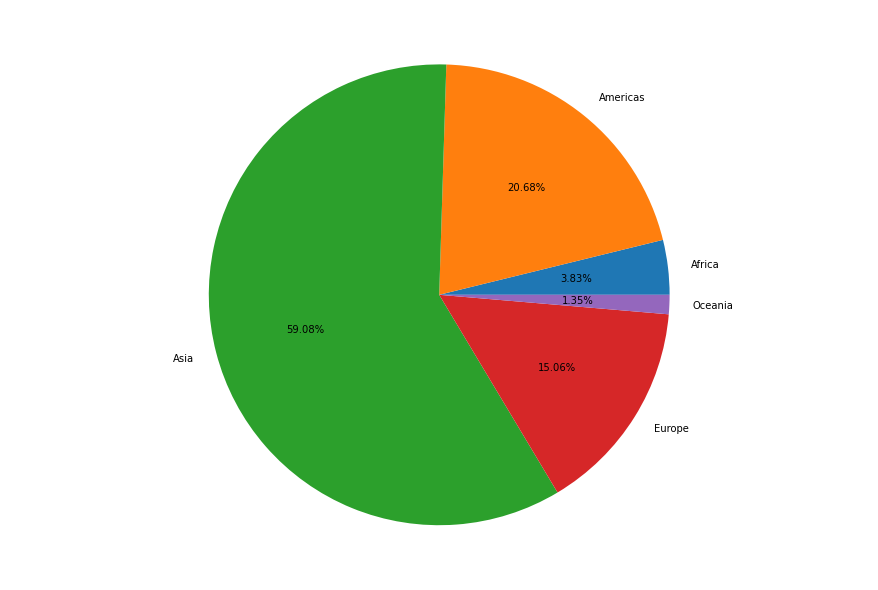

In [30]:
cont_df_final_tmp = cont_df_min[cont_df_min['Year'] == 2020]
cont_df_final_tmp = cont_df_final_tmp.groupby('continent').sum().reset_index()
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.axis('equal')
ax.pie(cont_df_final_tmp['co2'], labels = cont_df_final_tmp["continent"],autopct='%1.2f%%')
plt.show()

China and India's emissions were primarily responsible for 60% of Asia's emissions in 2020.

In [31]:
#filtering required columns
col_list=['ISO3','Year','co2']
col_list_1=['ISO3','co2']
df3 = clean_df[col_list].copy()
df4 = clean_df[col_list_1].copy()

In [32]:
#grouping by countries and getting the top 10 emitters
grouped = df4.groupby('ISO3').sum().reset_index()
sorted_top_10 = grouped.sort_values('co2', ascending=False)
top_10_co2 = sorted_top_10.iloc[:, 0]. tolist()[0:10]

In [33]:
#filtering for top 10 countries with co2 emissions
df5 = df3.copy()
df5 = df5[df5['ISO3'].isin(top_10_co2)]

## TOP 10 COUNTRIES IN CO2 EMISSIONS(1950-2020)

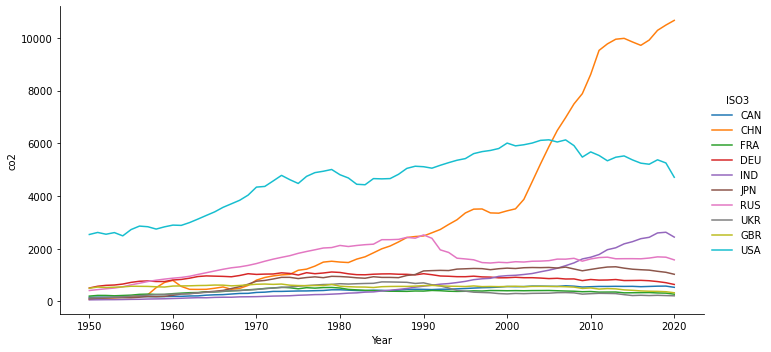

In [34]:
sns.relplot(
    data=df5, 
    x="Year", y="co2",hue='ISO3',
    height=5, aspect=2, 
    kind="line",ci=None
)

<ol>
  <li><b>USA</b> has been one of the biggest emitters of CO2 over the past 50 years.</li>
  <li><b>China</b> has seen an increase in CO2 emissions since the mid-1990s as a result of the change in industrial production</li>
  <li><b>Russia</b> has been a major source of CO2 emissions until the 1990s, when a declining trend began.</li>
  <li><b>India's</b> Contribution has also greatly increased since the middle of the 2000s and will continue to rise through 2020.</li>
</ol>

In [35]:
# df to calculate world emissions
world_df = clean_df[['Year','co2']].copy()
world_df = world_df.groupby('Year').sum().reset_index()

## TOP 10 EMITTERS AND THE WORLD EMISSIONS IN LAST DECADE(2011-2020)

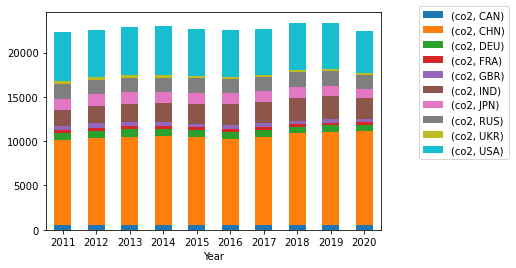

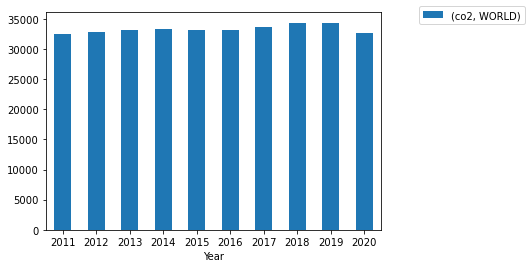

In [36]:
decade_ctr_df = df5[df5['Year'] > 2010]
g1 = decade_ctr_df.pivot(index='Year', columns='ISO3').plot(kind='bar', stacked=True, rot=0)
g1.legend(bbox_to_anchor=(1.1, 1.05))
wrld_df = world_df.copy()
wrld_df.insert(0,'ISO3','WORLD')
wrld_df = wrld_df[wrld_df['Year'] > 2010]
wrld_df
g2 = wrld_df.pivot(index='Year', columns='ISO3').plot(kind='bar', stacked=True, rot=0)
g2.legend(bbox_to_anchor=(1.1, 1.05))

We can observe that the top 10 nations account for a significant portion of CO2 emissions.

In [37]:
col_list_temp = ['ISO3','Year','co2','population']
per_captia_df = clean_df[col_list_temp].copy()
per_captia_df['co2_per_captia'] = per_captia_df['co2'] / per_captia_df['population']

In [38]:
per_captia_df.drop(['co2','population'],axis=1)
grouped_pcp = per_captia_df.groupby('ISO3').sum().reset_index()
sorted_top_10_pcp = grouped_pcp.sort_values('co2_per_captia', ascending=False)
top_10_co2_per_captia = sorted_top_10_pcp.iloc[:, 0]. tolist()[0:10]

In [39]:
df7 = per_captia_df[['ISO3','Year','co2_per_captia']].copy()
df8 = df7[df7['ISO3'].isin(top_10_co2_per_captia)]

## TOP 10 EMMITTERS BASED ON PER CAPTIA EMISSIONS

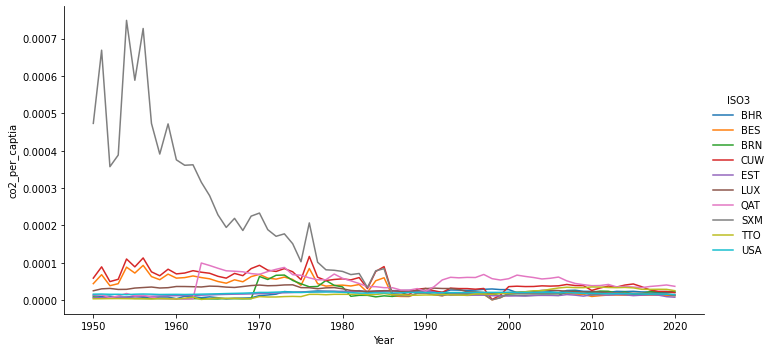

In [40]:
sns.relplot(
    data=df8, 
    x="Year", y="co2_per_captia",hue='ISO3',
    height=5, aspect=2, 
    kind="line",ci=None
)

None of the top 10 contributors are represented in the aforementioned chart, as can be seen. Major nations emit fewer greenhouse gases per capita because they have larger populations.<br>
The tiny Dutch territory of **Sint Maarten** had the greatest per capita emissions in the 1970s, but since then, emissions have been on the decline.<br>
We can see that **Kuwait** had the highest per capita emissions in the middle of the 1990s and continued to do so through 2020.

## PERCENTAGE CHANGE OF TOP 10 CONTRIBUTORS IN LAST DECADE

In [41]:
change_df = df5[df5['Year'] >= 2010]
change_df['pct'] = change_df.sort_values('Year').groupby(['ISO3']).co2.pct_change()

C:\Users\aishw\AppData\Local\Temp\ipykernel_26408\2617403210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  change_df['pct'] = change_df.sort_values('Year').groupby(['ISO3']).co2.pct_change()


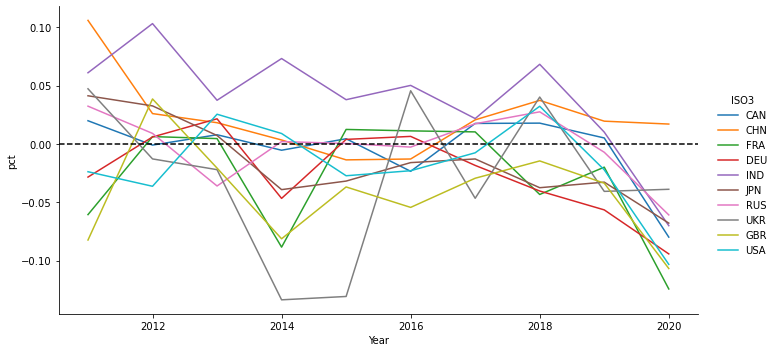

In [42]:
g3 = sns.relplot(
    data=change_df, 
    x="Year", y="pct",hue='ISO3',
    height=5, aspect=2, 
    kind="line",ci=None
)
g3.map(plt.axhline, y=0.00, ls='--', c='black')

With the exception of **China**, all other nine of the top 10 countries have seen a drop in their CO2 emissions, which is evident by the negative value in percentage change from **2018**.

## PERCENTAGE CHANGE OF CO2 OVER YEARS(1950-2020)- WORLD DATA

In [43]:
wrld_change_df = world_df.copy()
wrld_change_df.insert(0,'ISO3','WORLD')
wrld_change_df['pct'] = wrld_change_df.sort_values('Year').groupby(['ISO3']).co2.pct_change()

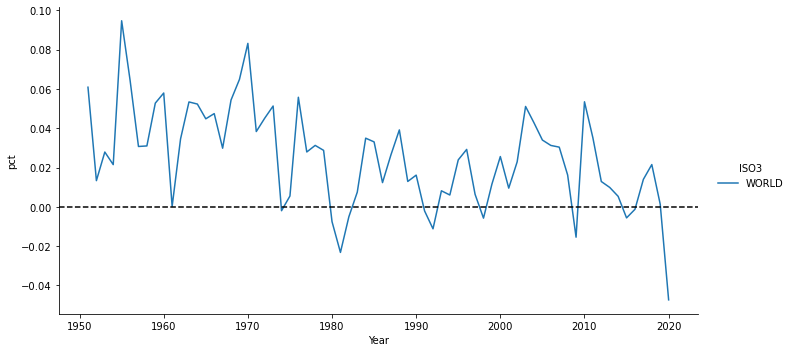

In [44]:
g4 = sns.relplot(
    data=wrld_change_df, 
    x="Year", y="pct",hue='ISO3',
    height=5, aspect=2, 
    kind="line",ci=None
)
g4.map(plt.axhline, y=0.00, ls='--', c='black')

# 4. Predictions using Linear Regression 

A statistical technique known as linear regression is used to describe relationships between a dependent variable and a set of independent variables. <br>
<br>An strategy for predicting a response based on a single feature is known as __simple linear regression__.<br>
<br>The two variables are thought to be linearly connected. As a result, we look for a linear function that can accurately predict the response value(y) as a function of the feature or independent variable (x).
<br><br>
For generality, we define:<br>
x as feature vector, i.e x = [x_1, x_2, …., x_n],<br>
y as response vector, i.e y = [y_1, y_2, …., y_n]<br>
for n observations.

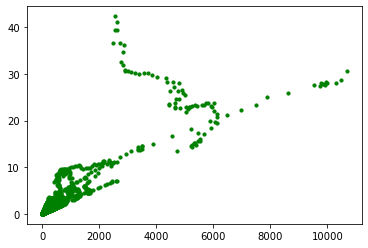

In [45]:
plt.scatter(clean_df.co2, clean_df.share_global_co2,
            color = "green", s = 10, label = 'Train data')

Now, the task is to find a line that fits best in the above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in a dataset)<br>
This line is called a regression line.<br>
The equation of regression line is represented as:<br>
$$h(x_{i}) = \beta_{0} + \beta_{1}x_{i}$$


Here,  <br><br>

$h(x_{i})$ represents the predicted response value for ith observation.<br>
$\beta_{0}$ and $\beta_{1}$ are regression coefficients and represent y-intercept and slope of regression line respectively.<br><br>

To create our model, we must “learn” or estimate the values of regression coefficients $\beta_{0}$ and $\beta_{1}$. And once we’ve estimated these coefficients, we can use the model to predict responses!<br>
We will be implementing the principle of Least Squares.<br><br>
Now consider:<br><br>
$$y_{i} = \beta_{0} + \beta_{1}x_{i} + \varepsilon_{i} = h(x_{i}) + \varepsilon_{i} \Rightarrow \varepsilon_{i} = y_{i} -h(x_{i})$$<br><br>
Here, $\varepsilon_{i}$ is a residual error in ith observation. 
So, our aim is to minimize the total residual error.<br>
We define the squared error or cost function, J as: <br><br>
$$J(\beta_{0},\beta_{1})= \frac{1}{2n} \sum_{i=1}^{n} \varepsilon_{i^{2}}$$<br>
and our task is to find the value of $\beta_{0}$ and $\beta_{1}$ for which J($\beta_{0}$,$\beta_{1})$ is minimum!<br>
which can be defined as - <br><br>
$$\beta_{1} = \frac{SS_{xy}}{SS_{xx}}$$<br>
$$\beta_{0} = \bar{y} - \beta_{1}\bar{x}$$<br>
where $SS_{xy}$ is the sum of cross-deviations of y and x:<br><br>
$$SS_{xy} = \sum_{i=1}^{n} (x_{i}-\bar{x})(y_{i}-\bar{y}) = \sum_{i=1}^{n} y_{i}x_{i} - n\bar{x}\bar{y}$$<br><br>
and $SS_{xx}$ is the sum of squared deviations of x: <br><br>
$$SS_{xx} = \sum_{i=1}^{n} (x_{i}-\bar{x})^2 = \sum_{i=1}^{n}x_{i}^2 - n(\bar{x})^2$$<br>

### Multiple linear regression

Multiple linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to the observed data.<br>
Clearly, it is nothing but an extension of simple linear regression.<br>
Consider a dataset with p features(or independent variables) and one response(or dependent variable). <br>
Also, the dataset contains n rows/observations.<br>
We define:<br><br>
X (feature matrix) = a matrix of size n x p where $x_{ij}$ denotes the values of jth feature for ith observation.<br><br>
So, <br>
\begin{pmatrix} x_{11} & \cdots & x_{1p} \\ x_{21} & \cdots & x_{2p} \\ \vdots & \ddots & \vdots \\ x_{n1} & \vdots & x_{np} \end{pmatrix}<br>
and<br>
y (response vector) = a vector of size n where $y_{i}$ denotes the value of response for ith observation.<br><br>
y = \begin{bmatrix} y_1\\ y_2\\ .\\ .\\ y_n \end{bmatrix}<br><br>
The regression line for p features is represented as: <br>
$$h(x_{i}) = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + .... + \beta_px_{ip}$$<br><br>
where $h(x_{i})$ is predicted response value for ith observation and $\beta_{0}$, $\beta_{1}$, …, $\beta_{p}$ are the regression coefficients.<br><br>
Also, we can write: <br><br>
$$\newline y_{i} = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + .... + \beta_{p}x_{ip} + \varepsilon_{i} \newline$$ or $$\newline y_{i} = h(x_{i}) + \varepsilon_{i} \Rightarrow \varepsilon_{i} = y_{i} - h(x_{i})$$<br><br>
where $\varepsilon_{i}$ represents residual error in ith observation.<br>
We can generalize our linear model a little bit more by representing feature matrix X as: <br><br>
$$X = \begin{pmatrix} 1 & x_{11} & \cdots & x_{1p} \\ 1 & x_{21} & \cdots & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & \cdots & x_{np} \end{pmatrix}$$<br><br>
So now, the linear model can be expressed in terms of matrices as: <br><br>
$$y = X\beta + \varepsilon$$<br>
where, <br>
$$\beta = \begin{bmatrix} \beta_{0}\\ \beta_{1}\\ .\\ .\\ \beta_{p} \end{bmatrix}$$<br>
and<br>
$$\varepsilon = \begin{bmatrix} \varepsilon_{1}\\ \varepsilon_{2}\\ .\\ .\\ \varepsilon_{n} \end{bmatrix}$$<br><br>
Now, we determine an estimate of $\beta$, i.e. $\hat{\beta}$ using the Least Squares method.<br>
As already explained, the Least Squares method tends to determine b’ for which total residual error is minimized.<br>
We present the result directly here: <br><br>
$$\hat{\beta} = (\hat{X}X)^{-1} \hat{X}y$$<br>
where $\hat{}$ represents the transpose of the matrix while -1 represents the matrix inverse.<br>
Knowing the least square estimates, $\hat{\beta}$, the multiple linear regression model can now be estimated as:<br><br>
$$\hat{y} = X\hat{\beta}$$<br><br>
where $\hat{y}$ is the estimated response vector.<br>

In [46]:
clean_df.head()

,ISO3,Year,CountryName,co2,population,co2_growth_abs,share_global_co2
1,AFG,1950,Afghanistan,0.084,7752117.0,0.070,0.0
2,AFG,1951,Afghanistan,0.092,7840151.0,0.007,0.0
3,AFG,1952,Afghanistan,0.092,7935996.0,0.000,0.0
4,AFG,1953,Afghanistan,0.106,8039684.0,0.015,0.0
5,AFG,1954,Afghanistan,0.106,8151316.0,0.000,0.0


In [47]:
new_df = clean_df.groupby('CountryName')
final_df = [new_df.get_group(x) for x in new_df.groups]
final_df

[   ISO3  Year  CountryName     co2  population  co2_growth_abs  \
 1   AFG  1950  Afghanistan   0.084   7752117.0           0.070   
 2   AFG  1951  Afghanistan   0.092   7840151.0           0.007   
 3   AFG  1952  Afghanistan   0.092   7935996.0           0.000   
 4   AFG  1953  Afghanistan   0.106   8039684.0           0.015   
 5   AFG  1954  Afghanistan   0.106   8151316.0           0.000   
 ..  ...   ...          ...     ...         ...             ...   
 67  AFG  2016  Afghanistan   6.745  35383028.0          -1.160   
 68  AFG  2017  Afghanistan   6.860  36296111.0           0.115   
 69  AFG  2018  Afghanistan   8.345  37171922.0           1.485   
 70  AFG  2019  Afghanistan  12.147  38041757.0           3.802   
 71  AFG  2020  Afghanistan  12.160  38928341.0           0.014   
 
     share_global_co2  
 1               0.00  
 2               0.00  
 3               0.00  
 4               0.00  
 5               0.00  
 ..               ...  
 67              0.02  
 6

In [48]:
clean_df

,ISO3,Year,CountryName,co2,population,co2_growth_abs,share_global_co2
1,AFG,1950,Afghanistan,0.084,7752117.0,0.070,0.00
2,AFG,1951,Afghanistan,0.092,7840151.0,0.007,0.00
3,AFG,1952,Afghanistan,0.092,7935996.0,0.000,0.00
4,AFG,1953,Afghanistan,0.106,8039684.0,0.015,0.00
5,AFG,1954,Afghanistan,0.106,8151316.0,0.000,0.00
...,...,...,...,...,...,...,...
25199,ZWE,2016,Zimbabwe,10.738,14030338.0,-1.488,0.03
25200,ZWE,2017,Zimbabwe,9.582,14236599.0,-1.156,0.03
25201,ZWE,2018,Zimbabwe,11.854,14438812.0,2.273,0.03
25202,ZWE,2019,Zimbabwe,10.949,14645473.0,-0.905,0.03


In [49]:
clean_df.corr()

,Year,co2,population,co2_growth_abs,share_global_co2
Year,1.000000,0.094437,0.083518,-0.006355,-0.002880
co2,0.094437,1.000000,0.634882,0.428149,0.885709
population,0.083518,0.634882,1.000000,0.464794,0.527419
co2_growth_abs,-0.006355,0.428149,0.464794,1.000000,0.408351
share_global_co2,-0.002880,0.885709,0.527419,0.408351,1.000000


In [50]:
final_df[0].corr()

,Year,co2,population,co2_growth_abs,share_global_co2
Year,1.000000,0.712808,0.919561,0.192592,0.549004
co2,0.712808,1.000000,0.806822,0.362079,0.895376
population,0.919561,0.806822,1.000000,0.254920,0.590920
co2_growth_abs,0.192592,0.362079,0.254920,1.000000,0.346804
share_global_co2,0.549004,0.895376,0.590920,0.346804,1.000000


In [51]:
X = clean_df[['Year','population','co2_growth_abs','share_global_co2']]
X

,Year,population,co2_growth_abs,share_global_co2
1,1950,7752117.0,0.070,0.00
2,1951,7840151.0,0.007,0.00
3,1952,7935996.0,0.000,0.00
4,1953,8039684.0,0.015,0.00
5,1954,8151316.0,0.000,0.00
...,...,...,...,...
25199,2016,14030338.0,-1.488,0.03
25200,2017,14236599.0,-1.156,0.03
25201,2018,14438812.0,2.273,0.03
25202,2019,14645473.0,-0.905,0.03


In [52]:
X = final_df[0][['Year','population','co2_growth_abs','share_global_co2']]
X

,Year,population,co2_growth_abs,share_global_co2
1,1950,7752117.0,0.070,0.00
2,1951,7840151.0,0.007,0.00
3,1952,7935996.0,0.000,0.00
4,1953,8039684.0,0.015,0.00
5,1954,8151316.0,0.000,0.00
...,...,...,...,...
67,2016,35383028.0,-1.160,0.02
68,2017,36296111.0,0.115,0.02
69,2018,37171922.0,1.485,0.02
70,2019,38041757.0,3.802,0.03


In [53]:
y = clean_df[['co2']]
y

,co2
1,0.084
2,0.092
3,0.092
4,0.106
5,0.106
...,...
25199,10.738
25200,9.582
25201,11.854
25202,10.949


In [54]:
y = final_df[0][['co2']]
y

,co2
1,0.084
2,0.092
3,0.092
4,0.106
5,0.106
...,...
67,6.745
68,6.860
69,8.345
70,12.147


In [55]:
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model, metrics
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [56]:
reg = linear_model.LinearRegression()

In [57]:
reg.fit(X_train,y_train)

LinearRegression()

In [58]:
reg.coef_

array([[-3.69321890e-02,  2.47602395e-07,  1.43918288e-01,
         2.00385687e+02]])

In [59]:
reg.score(X_test,y_test)

0.9097596015142148

In [60]:
y_pred = reg.predict(X_test)

In [61]:
y_pred.shape

(29, 1)

In [62]:
y_test.shape

(29, 1)

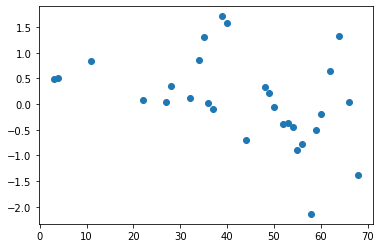

In [63]:
#comparing actual and expected values and plotting the difference
g=plt.plot(y_test - y_pred,marker='o',linestyle='')

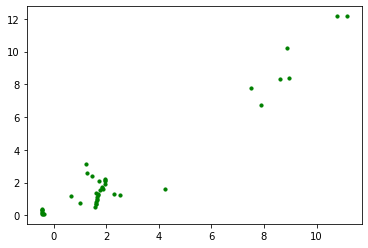

In [64]:
plt.scatter(reg.predict(X_train), y_train,
            color = "green", s = 10, label = 'Train data')

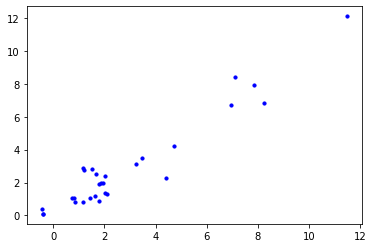

In [65]:
plt.scatter(reg.predict(X_test), y_test,
            color = "blue", s = 10, label = 'Test data')

In [66]:
reg.predict(X_test)

array([[ 7.85440909],
       [ 1.93575604],
       [ 8.24449942],
       [ 1.79299322],
       [ 2.03361851],
       [11.46104378],
       [ 0.86069848],
       [ 3.23878627],
       [ 0.81414628],
       [ 1.85993587],
       [-0.40120502],
       [ 1.19671013],
       [ 1.63300714],
       [ 3.47656719],
       [ 2.03306852],
       [ 4.40766921],
       [ 7.12281511],
       [ 1.41977492],
       [ 2.0880592 ],
       [ 0.75308823],
       [ 1.1798458 ],
       [ 1.5211289 ],
       [ 1.80941132],
       [ 6.93257674],
       [-0.41030504],
       [ 1.14778103],
       [ 1.65832011],
       [ 4.71148703],
       [-0.42978995]])

In [67]:
y_test

,co2
66,7.904
27,1.981
68,6.860
55,0.889
28,2.384
62,12.106
50,0.810
37,3.134
49,1.029
32,1.978


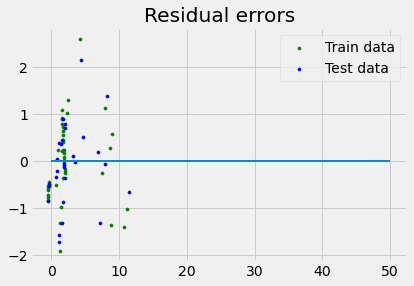

In [68]:
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [69]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]


for item in classifiers:
    print(item)
    model = item
    model.fit(X_train, y_train)
    print(model.score(X_test,y_test))
    print(model.predict(X_test),'\n')

SVR()
0.35246906404415446
[7.01571402 1.56173624 7.18459321 4.83866004 1.61343248 6.26527433
 3.49119938 1.30316249 3.3643085  1.6135204  0.68766406 1.33030315
 4.53174506 1.34461535 2.26692383 5.50963928 6.699088   4.21145185
 5.10616642 3.25342337 3.91593543 1.40037189 1.25081746 5.85089773
 0.69982174 1.27927537 1.47203222 5.6763049  0.82521303] 

SGDRegressor()
-1.1287361156922576e+46
[4.91300334e+23 1.84780148e+23 5.18175648e+23 3.53006709e+23
 1.88038022e+23 4.29966460e+23 2.87965984e+23 1.67549813e+23
 2.81783232e+23 1.88043519e+23 1.13297154e+23 1.69444226e+23
 3.38076261e+23 1.70434018e+23 2.25803311e+23 3.86896628e+23
 4.60691716e+23 3.22656435e+23 3.66249223e+23 2.76349031e+23
 3.08468871e+23 1.74232979e+23 1.63827585e+23 4.05373974e+23
 1.14777439e+23 1.65862793e+23 1.78993080e+23 3.95772782e+23
 1.28443932e+23] 

BayesianRidge()
0.24485149927030103
[8.43725494 1.66250701 9.03137486 5.38011744 1.73446897 7.08136117
 3.94230648 1.28065858 3.80567391 1.7342544  0.08382897 1.3

C:\Users\aishw\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aishw\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aishw\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aishw\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to sca

0.6350642163330096
[ 6.10861555  1.74169615  6.38330131  3.44752801  1.98444355  7.74520061
  2.79091661  2.40237288  2.76334852  2.06173054 -0.1265018   2.08651648
  3.44070983  2.74243877  2.68186273  4.65601102  5.15883855  3.3256084
  3.82464237  2.67750368  3.10799741  2.08384365  1.52713102  6.03726481
 -0.07535071  1.96851588  2.12796443  5.19603064  0.27805342] 

LinearRegression()
0.9097596015142148
[[ 7.85440909]
 [ 1.93575604]
 [ 8.24449942]
 [ 1.79299322]
 [ 2.03361851]
 [11.46104378]
 [ 0.86069848]
 [ 3.23878627]
 [ 0.81414628]
 [ 1.85993587]
 [-0.40120502]
 [ 1.19671013]
 [ 1.63300714]
 [ 3.47656719]
 [ 2.03306852]
 [ 4.40766921]
 [ 7.12281511]
 [ 1.41977492]
 [ 2.0880592 ]
 [ 0.75308823]
 [ 1.1798458 ]
 [ 1.5211289 ]
 [ 1.80941132]
 [ 6.93257674]
 [-0.41030504]
 [ 1.14778103]
 [ 1.65832011]
 [ 4.71148703]
 [-0.42978995]] 



# 5. Forecasting using Naive bayes classification

Even if the regressors (train X) make much more sense when assumed to be categorical variables, it's interesting that Bernoulli Naive Bayes yielded nonsensical predictions. Since there is still a natural order in the regressors, using Gaussian Naive Bayes was much better. For this reason, even though some assumptions might not be fully met, I advise experimentation with a wide range of models.

In [70]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X = y.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):

    yhat = history[-1]
    predictions.append(yhat)
    
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=2.822, Expected=  4
>Predicted=3.501, Expected=  3
>Predicted=3.134, Expected=  3
>Predicted=3.114, Expected=  3
>Predicted=2.857, Expected=  3
>Predicted=2.765, Expected=  3
>Predicted=2.603, Expected=  2
>Predicted=2.427, Expected=  1
>Predicted=1.379, Expected=  1
>Predicted=1.333, Expected=  1
>Predicted=1.282, Expected=  1
>Predicted=1.230, Expected=  1
>Predicted=1.165, Expected=  1
>Predicted=1.084, Expected=  1
>Predicted=1.029, Expected=  1
>Predicted=0.810, Expected=  1
>Predicted=0.758, Expected=  1
>Predicted=0.798, Expected=  1
>Predicted=1.052, Expected=  1
>Predicted=1.186, Expected=  1
>Predicted=0.889, Expected=  1
>Predicted=1.303, Expected=  2
>Predicted=1.635, Expected=  2
>Predicted=2.269, Expected=  4
>Predicted=4.200, Expected=  7
>Predicted=6.740, Expected=  8
>Predicted=8.398, Expected= 12
>Predicted=12.106, Expected= 10
>Predicted=10.219, Expected=  8
>Predicted=8.441, Expected=  8
>Predicted=7.774, Expected=  8
>Predicted=7.904, Expected=  7
>Predi

# 6. Forecasting using Random Forest Regression

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [72]:
print(final_df[0].columns)
print(final_df[0].shape)
rf_df = final_df[0]
print(rf_df.head())

Index(['ISO3', 'Year', 'CountryName', 'co2', 'population', 'co2_growth_abs',
       'share_global_co2'],
      dtype='object')
(71, 7)
  ISO3  Year  CountryName    co2  population  co2_growth_abs  share_global_co2
1  AFG  1950  Afghanistan  0.084   7752117.0           0.070               0.0
2  AFG  1951  Afghanistan  0.092   7840151.0           0.007               0.0
3  AFG  1952  Afghanistan  0.092   7935996.0           0.000               0.0
4  AFG  1953  Afghanistan  0.106   8039684.0           0.015               0.0
5  AFG  1954  Afghanistan  0.106   8151316.0           0.000               0.0


In [73]:
 # Shift close down to predict next day
rf_df=pd.concat([rf_df.population, rf_df.co2.shift(-10),rf_df.co2_growth_abs, rf_df.share_global_co2 ], axis=1)

In [74]:
rf_df

,population,co2,co2_growth_abs,share_global_co2
1,7752117.0,0.414,0.070,0.00
2,7840151.0,0.491,0.007,0.00
3,7935996.0,0.689,0.000,0.00
4,8039684.0,0.707,0.015,0.00
5,8151316.0,0.839,0.000,0.00
...,...,...,...,...
67,35383028.0,NaN,-1.160,0.02
68,36296111.0,NaN,0.115,0.02
69,37171922.0,NaN,1.485,0.02
70,38041757.0,NaN,3.802,0.03


In [75]:
def valid(col):
     return 'co2' not in col
# Because there is no tomorrow for the last row to predict, we eliminate the final observation (last row).
rf_X = rf_df[[x for x in rf_df.columns if valid(x)]].iloc[:-10]
#rf_X.drop([ISO3])

# We eliminate the NA for the dependent variable, which also eliminates the final row.
rf_y = rf_df.co2.dropna()


In [76]:
rf_X.T

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
population,7752117.0,7840151.0,7935996.0,8039684.0,8151316.0,8270992.0,8398873.0,8535157.0,8680097.0,8833947.0,...,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0


In [77]:
rf_y

1      0.414
2      0.491
3      0.689
4      0.707
5      0.839
       ...  
57     6.745
58     6.860
59     8.345
60    12.147
61    12.160
Name: co2, Length: 61, dtype: float64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(rf_X, rf_y, random_state=42)

In [79]:
# Create a model 
rf_model = RandomForestRegressor()

In [80]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [81]:
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
rf_model.score(X_test, y_test)

0.8770678099088814

In [82]:
y_pred = rf_model.predict(X_test)

In [83]:
type(y_pred)

numpy.ndarray

In [84]:
y_pred[0:10]

array([0.60018, 0.95736, 2.22972, 2.48614, 1.90204, 7.10536, 2.46752,
       5.60552, 1.82364, 2.82164])

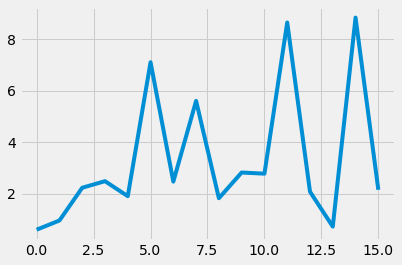

In [85]:
import matplotlib.pyplot as plt
plt.plot(y_pred)

In [86]:
type(y_test)

pandas.core.series.Series

In [87]:
y_test2 = y_test.values
type(y_test2)

numpy.ndarray

In [88]:
y_test2[0:10]

array([0.414, 1.007, 1.635, 2.427, 1.635, 7.904, 1.282, 6.74 , 1.53 ,
       0.758])

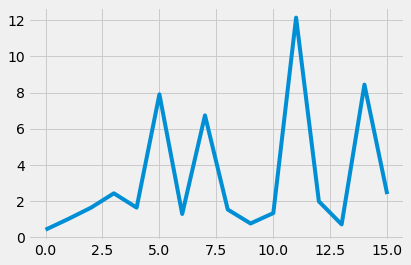

In [89]:
import matplotlib.pyplot as plt
plt.plot(y_test2)

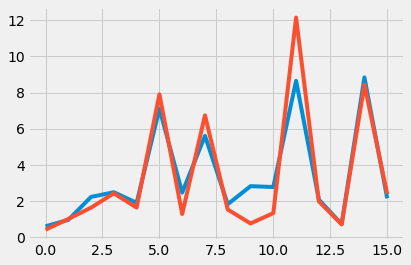

In [90]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test2)

In [91]:
pd.concat([pd.Series(y_pred), y_test.reset_index(drop=True)], axis=1)

,0,co2
0,0.60018,0.414
1,0.95736,1.007
2,2.22972,1.635
3,2.48614,2.427
4,1.90204,1.635
5,7.10536,7.904
6,2.46752,1.282
7,5.60552,6.740
8,1.82364,1.530
9,2.82164,0.758


In [92]:
final_df[68].head()

,ISO3,Year,CountryName,co2,population,co2_growth_abs,share_global_co2
10907,IND,1950,India,61.177,376325200.0,4.912,1.02
10908,IND,1951,India,64.100,382376945.0,2.922,1.00
10909,IND,1952,India,67.509,388799076.0,3.409,1.04
10910,IND,1953,India,68.789,395544365.0,1.280,1.03
10911,IND,1954,India,72.500,402578594.0,3.711,1.07


(71, 7)
10
(61, 1)
(61,)
[ 127.31935  145.76481 1237.3894   598.02618  209.90748 2338.16463
  738.36275 1619.13603  192.0761   958.70529]


,0,co2
0,127.31935,111.450
1,145.76481,153.868
2,1237.38940,1259.744
3,598.02618,615.925
4,209.90748,209.291
5,2338.16463,2268.567
6,738.36275,716.918
7,1619.13603,1612.817
8,192.07610,203.227
9,958.70529,978.919


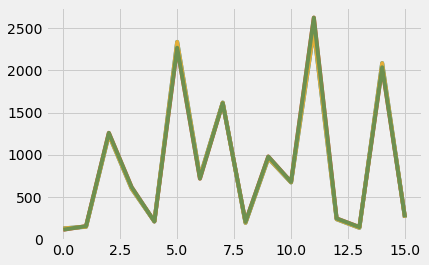

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
rf_ind = final_df[68]
print(rf_ind.shape)
# Shift close down to predict next day
rf_ind=pd.concat([rf_ind.population, rf_ind.co2.shift(-10),rf_ind.co2_growth_abs, rf_ind.share_global_co2 ], axis=1)
def valid(col): return 'co2' not in col
# we remove the last observation (last row) because there is no tomorrow for the last row to predict!
rf_ind_X = rf_ind[[x for x in rf_df.columns if valid(x)]].iloc[:-10]
print(rf_ind.co2.isna().sum())
print(rf_ind_X.shape)
# for the dependent variable, we remove the NA, so that removes the last row, too
rf_ind_y = rf_ind.co2.dropna()
print(rf_ind_y.shape)
X_train, X_test, y_train, y_test = train_test_split(rf_ind_X, rf_ind_y, random_state=42)
# Create a model
rf_model = RandomForestRegressor()
# Train the model
rf_model.fit(X_train, y_train)
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
rf_model.score(X_test, y_test)
y_pred = rf_model.predict(X_test)
print(y_pred[0:10])
import matplotlib.pyplot as plt
plt.plot(y_pred)
y_test2 = y_test.values
type(y_test2)
import matplotlib.pyplot as plt
plt.plot(y_test2)
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test2)
pd.concat([pd.Series(y_pred), y_test.reset_index(drop=True)], axis=1)

(71, 7)
10
(61, 1)
(61,)
[2980.41157 3385.37188 6124.0831  5118.54912 4552.6225  5413.84051
 5382.85342 5739.44584 4408.4953  5832.21474]


,0,co2
0,2980.41157,2897.138
1,3385.37188,3399.342
2,6124.08310,6051.668
3,5118.54912,5057.931
4,4552.62250,4784.823
5,5413.84051,5371.771
6,5382.85342,5358.824
7,5739.44584,5478.210
8,4408.49530,4572.791
9,5832.21474,6010.508


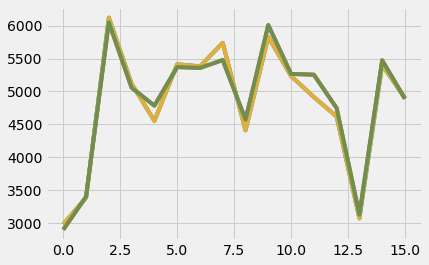

In [94]:
rf_usa = final_df[155]
print(rf_usa.shape)
# Shift close down to predict next day
rf_usa=pd.concat([rf_usa.population, rf_usa.co2.shift(-10),rf_usa.co2_growth_abs, rf_usa.share_global_co2 ], axis=1)



def valid(col): return 'co2' not in col
# we remove the last observation (last row) because there is no tomorrow for the last row to predict!
rf_usa_X = rf_usa[[x for x in rf_df.columns if valid(x)]].iloc[:-10]



print(rf_usa.co2.isna().sum())
print(rf_usa_X.shape)
# for the dependent variable, we remove the NA, so that removes the last row, too
rf_usa_y = rf_usa.co2.dropna()
print(rf_usa_y.shape)
X_train, X_test, y_train, y_test = train_test_split(rf_usa_X, rf_usa_y, random_state=42)
# Create a model
rf_model = RandomForestRegressor()
# Train the model
rf_model.fit(X_train, y_train)
# Get R2 measure (usaicator of accuracy 1 is perfect, 0 is horrible)
rf_model.score(X_test, y_test)
y_pred = rf_model.predict(X_test)
print(y_pred[0:10])
import matplotlib.pyplot as plt
plt.plot(y_pred)
y_test2 = y_test.values
type(y_test2)
import matplotlib.pyplot as plt
plt.plot(y_test2)
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test2)
pd.concat([pd.Series(y_pred), y_test.reset_index(drop=True)], axis=1)

(71, 7)
10
(61, 1)
(61,)
[2965.95348 3371.38333 6121.13951 5125.29381 4554.60028 5422.57804
 5391.71517 5731.61727 4415.27157 5821.40589]


,0,co2
0,2965.95348,2897.138
1,3371.38333,3399.342
2,6121.13951,6051.668
3,5125.29381,5057.931
4,4554.60028,4784.823
5,5422.57804,5371.771
6,5391.71517,5358.824
7,5731.61727,5478.210
8,4415.27157,4572.791
9,5821.40589,6010.508


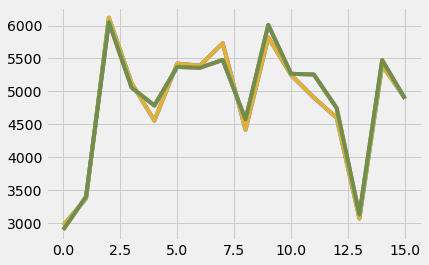

In [95]:
rf_chn = final_df[155]
print(rf_chn.shape)
# Shift close down to predict next day
rf_chn=pd.concat([rf_chn.population, rf_chn.co2.shift(-10),rf_chn.co2_growth_abs, rf_chn.share_global_co2 ], axis=1)


def valid(col): return 'co2' not in col
# we remove the last observation (last row) because there is no tomorrow for the last row to predict!
rf_chn_X = rf_chn[[x for x in rf_df.columns if valid(x)]].iloc[:-10]



print(rf_chn.co2.isna().sum())
print(rf_chn_X.shape)
# for the dependent variable, we remove the NA, so that removes the last row, too
rf_chn_y = rf_chn.co2.dropna()
print(rf_chn_y.shape)
rf_chn_y = rf_chn.co2.dropna()


X_train, X_test, y_train, y_test = train_test_split(rf_chn_X, rf_chn_y, random_state=42)
# Create a model
rf_model = RandomForestRegressor()
# Train the model
rf_model.fit(X_train, y_train)
# Get R2 measure (canicator of accuracy 1 is perfect, 0 is horrible)
rf_model.score(X_test, y_test)
y_pred = rf_model.predict(X_test)
print(y_pred[0:10])
import matplotlib.pyplot as plt
plt.plot(y_pred)
y_test2 = y_test.values
type(y_test2)
import matplotlib.pyplot as plt
plt.plot(y_test2)
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test2)
pd.concat([pd.Series(y_pred), y_test.reset_index(drop=True)], axis=1)

# 7. Conclusion 
According to the percentage change graph for CO2 emissions, the total amount of CO2 emissions across the globe is steadily rising.
<br><br>
We see a small decrease in CO2 during the year 2015, but it wasn't sustained, showing that the countries aren't focused on lowering the carbon footprint globally.
<br><br>
But in 2020, there is a sharp decline in CO2 emissions that may be attributed to the pandemic crisis. This is the biggest decline in CO2 emissions that the world has ever seen.
<br><br>
If we want to achieve the goals of the Paris Climate Agreement, countries must collectively take action to reduce CO2 emissions.
We have employed many strategies to anticipate the data while estimating global CO2 emissions, including categorization techniques and regression models.
<br><br>
Through the use of the Naive-Bayes Classification approach, we were able to achieve RMSE value of 1.232 . Applying several Regression methods, we found that RandomForest had an accuracy of 96%, Linear Regression had a 90% accuracy, Theil Sen Regression had a 64% accuracy, and ARD Regression had an accuracy of 87%.

# 8. Future Scope
For additional information on pollutants and greenhouse gas emissions, this model can be expanded.
<br>
We already have global data visualizations and modeling, thus it would be beneficial to have a customized analysis for each country based on their emission rate.
<br>
Additionally, we may investigate more sophisticated machine learning models like ARIMA and neural networks and broaden the dataset's coverage by incorporating monthly data going back 70 years.
<br>